In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [2]:
df = pd.read_csv('data/deep_analysis_data_for_v2.csv')

In [3]:
df1 = df.copy()

In [4]:
df.head()

,customer_email,level_1,transaction_reference,payment_reference,merchant,customer_name,cust_email,customer_phone_number,merchant_bears_cost,tran_date,...,phone_txn_amount_suspicious,rolling_txn_count_per_customer,txn_spike_flag,avg_txn_amount_per_customer,unusual_txn_flag,rolling_mean_amount,amount_spike_flag,duplicate_txn_flag,time_diff,odd_hour_flag
0,001daman100@gmail.com,131119,KPY-CA-r0hEfAhffbv0,38262010121656,Nexasoft Limited,David Amankwah,001daman100@gmail.com,2.335087e+11,1,2024-12-05 02:50:34,...,0,1.0,0,153.0,0,153.0,0,0,NaN,1
1,003kfx@gmail.com,52770,KPY-CA-BVbXPVkbZ10N,217666212,Exness,EVANS KOOMSON,003kfx@gmail.com,2.335501e+11,1,2024-10-25 14:36:25,...,0,1.0,1,445.0,0,1000.0,0,0,NaN,0
2,003kfx@gmail.com,92356,KPY-CA-BD6zJ3HWAdAy,224006476,Exness,EVANS KOOMSON,003kfx@gmail.com,2.335501e+11,1,2024-11-14 18:51:27,...,0,2.0,0,445.0,0,585.0,0,0,1743302.0,0
3,003kfx@gmail.com,139152,KPY-CA-6j8jNhqtKdh5,230551425,Exness,EVANS KOOMSON,003kfx@gmail.com,2.335501e+11,1,2024-12-08 16:27:46,...,0,3.0,0,445.0,0,445.0,0,0,2064979.0,0
4,004.teyeemmanuel@gmail.com,139042,KPY-CA-9Q6fbJPs3fC0,27635010124566,Nexasoft Limited,Samuel Teye Amartey,004.teyeemmanuel@gmail.com,2.335402e+11,1,2024-12-08 15:00:54,...,0,1.0,1,419.0,0,149.0,0,0,NaN,0


In [5]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [6]:
df.merchant.value_counts()

merchant
Exness                              159324
Nexasoft Limited                    104151
Headway                              57449
BLENET LTD                           50863
HONGKONG FORTUNETECH LIMITED          7433
Bitolo                                7262
OnUs Financial Services               3163
Spoynt Limited                        1863
AstroPay                              1768
Maven                                  908
Evalanch Ltd                           716
CMT                                    587
Trans-Fi UAB                           583
TUMANI TECH - SMC LTD                  174
FAMSUP TECHNOLOGIES LIMITED             96
Tickmill Ltd                            74
Lexel Digital Ltd                       68
Gate Express                            63
Doo Prime                               38
Vantage Markets (Pty) Ltd               28
MODMOUNT SERVICES LIMITED               27
thePropTrade                            22
CWG Markets LTD                         22
Sy

In [7]:
# merchant
df['is_Exness'] = (df['merchant']=='Exness').astype(int)
df['is_Nexasoft'] = (df['merchant']=='Nexasoft Limited').astype(int)
df['is_Headway'] = (df['merchant']=='Headway').astype(int)
df['is_Blenet'] = (df['merchant']=='BLENET LTD').astype(int)
df['is_Hongkong'] = (df['merchant']=='HONGKONG FORTUNETECH LIMITED').astype(int)
df['is_Bitolo'] = (df['merchant']=='Bitolo').astype(int)
df['is_Onus'] = (df['merchant']=='OnUs Financial Services').astype(int)
df['is_Astropay'] = (df['merchant']=='AstroPay').astype(int)
df['is_Spoynt'] = (df['merchant']=='Spoynt Limited').astype(int)
df['is_Gateexpress'] = (df['merchant']=='Gate Express').astype(int)

In [8]:
# account_risk_level
account_risk_level_encoded = pd.get_dummies(df['account_risk_level'], prefix='account_risk_level').astype(int)
df = pd.concat([df, account_risk_level_encoded], axis=1)

In [9]:
# payment_status
payment_status_encoded = pd.get_dummies(df['payment_status'], prefix='payment_status').astype(int)
df = pd.concat([df, payment_status_encoded], axis=1)

In [10]:
# payment_channel
payment_channel_encoded = pd.get_dummies(df['payment_channel'], prefix='payment_channel').astype(int)
df = pd.concat([df, payment_channel_encoded], axis=1)

In [11]:
# mobile_network_provider
mobile_network_provider_encoded = pd.get_dummies(df['mobile_network_provider'], prefix='mobile_network_provider').astype(int)
df = pd.concat([df, mobile_network_provider_encoded], axis=1)

In [12]:
# kora_translated_processor_response
df['is_success'] = (df['kora_translated_processor_response']=='Charge successful').astype(int)
df['is_insufficient_funds'] = ((df['kora_translated_processor_response']=='Insufficient funds or \
transaction limit reached') | (df['kora_translated_processor_response']=='The balance is \
insufficient for the transaction') | (df['kora_translated_processor_response']=='The amount\
requested is above the limit permitted by your financial institution, please contact your financial institution')).astype(int)
df['is_charge_attempt_failed'] = (df['kora_translated_processor_response']=='Charge attempt failed, please try again').astype(int)
df['is_wallet_not_active'] = (df['kora_translated_processor_response']=='Your wallet is not active. Please contact your financial institution').astype(int)
df['is_invalid_recipient_wallet'] = (df['kora_translated_processor_response']=='The recipient wallet is invalid').astype(int)
df['is_invalid_PIN'] = (df['kora_translated_processor_response']=='Incorrect PIN').astype(int)


In [13]:
# created_dow
created_dow_encoded = pd.get_dummies(df['created_dow'], prefix='created_dow').astype(int)
df = pd.concat([df, created_dow_encoded], axis=1)

#### confidence_score

In [14]:
df['confidence_score'] = 0
df.loc[(df['phone_number_diff'].abs() > 0) & (df['phone_number_diff'].abs() < 101), 'confidence_score'] += 8
df.loc[df['unique_phone_numbers'] > 5, 'confidence_score'] += 8
df.loc[df['txn_count_per_customer_per_hour'] > 10, 'confidence_score'] += 8
df.loc[df['txn_count_per_customer_per_day'] > 20, 'confidence_score'] += 8
df.loc[df['txn_spike_flag'] == 1, 'confidence_score'] += 7
df.loc[df['amount_spike_flag'] == 1, 'confidence_score'] += 8
df.loc[df['unusual_txn_flag'] == 1, 'confidence_score'] += 8
df.loc[df['phone_txn_amount_suspicious'] == 1, 'confidence_score'] += 7
df.loc[df['duplicate_txn_flag'] == 1, 'confidence_score'] += 8
df.loc[df['odd_hour_flag'] == 1, 'confidence_score'] += 7
df.loc[df['is_invalid_PIN'] == 1, 'confidence_score'] += 7

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['confidence_score'] = scaler.fit_transform(df[['confidence_score']])  # normalising between 0 and 1

In [17]:
import pickle

In [18]:
filename = "models/scaler.pkl"
try:
    with open(filename, 'wb') as file:
        pickle.dump(scaler, file)
    print(f"Scaler successfully pickled and saved as '{filename}'")
except Exception as e:
    print(f"An error occurred during pickling: {e}")

Scaler successfully pickled and saved as 'models/scaler.pkl'


In [31]:
df.head()

,customer_email,level_1,transaction_reference,payment_reference,merchant,customer_name,cust_email,customer_phone_number,merchant_bears_cost,tran_date,payment_created_at,payment_updated_at,account_created_date,account_risk_level,payment_status,payment_channel,payment_reversals_type,mobile_number_for_mobile_money,mobile_network_provider,processor_response,kora_translated_processor_response,amount,amount_collected,is_fraud,created_dow,created_hod,created_month,completed_dow,completed_hod,completed_month,payment_completion_time_secs,phone_number_diff,unique_phone_numbers,diff_number_txns,total_transactions,proportion_different_numbers,average_phone_number_difference,shared_phone_number_flag,txn_count_per_customer,txn_count_per_customer_per_hour,max_txns_in_an_hour_per_customer,txn_count_per_customer_per_day,phone_txn_amount_suspicious,rolling_txn_count_per_customer,txn_spike_flag,avg_txn_amount_per_customer,unusual_txn_flag,rolling_mean_amount,amount_spike_flag,duplicate_txn_flag,time_diff,odd_hour_flag,is_Exness,is_Nexasoft,is_Headway,is_Blenet,is_Hongkong,is_Bitolo,is_Onus,is_Astropay,is_Spoynt,is_Gateexpress,account_risk_level_above_average_risk,account_risk_level_high_risk,payment_status_expired,payment_status_failed,payment_status_success,payment_channel_api,payment_channel_modal,mobile_network_provider_Airtel,mobile_network_provider_MTN,mobile_network_provider_Vodafone,is_success,is_insufficient_funds,is_charge_attempt_failed,is_wallet_not_active,is_invalid_recipient_wallet,is_invalid_PIN,created_dow_Friday,created_dow_Monday,created_dow_Saturday,created_dow_Sunday,created_dow_Thursday,created_dow_Tuesday,created_dow_Wednesday,confidence_score
0,001daman100@gmail.com,131119,KPY-CA-r0hEfAhffbv0,38262010121656,Nexasoft Limited,David Amankwah,001daman100@gmail.com,2.335087e+11,1,2024-12-05 02:50:34,2024-12-05 02:50:34,2024-12-05 02:51:05,2023-07-27 12:36:23,above_average_risk,success,api,0,233592381050,MTN,Transaction successful.,Charge successful,153.0,153.0,0,Thursday,2,December,Thursday,2,December,31.0,0.0,1,0,1,0.0,0.0,1,1,1,1,1,0,1.0,0,153.0,0,153.0,0,0,NaN,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0.090909
1,003kfx@gmail.com,52770,KPY-CA-BVbXPVkbZ10N,217666212,Exness,EVANS KOOMSON,003kfx@gmail.com,2.335501e+11,1,2024-10-25 14:36:25,2024-10-25 14:36:25,2024-10-25 14:37:04,2021-04-21 11:55:06,high_risk,success,api,0,233550144312,MTN,Transaction successful.,Charge successful,1000.0,1000.0,0,Friday,14,October,Friday,14,October,39.0,0.0,1,0,3,0.0,0.0,1,3,1,1,1,0,1.0,1,445.0,0,1000.0,0,0,NaN,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0.090909
2,003kfx@gmail.com,92356,KPY-CA-BD6zJ3HWAdAy,224006476,Exness,EVANS KOOMSON,003kfx@gmail.com,2.335501e+11,1,2024-11-14 18:51:27,2024-11-14 18:51:27,2024-11-14 18:52:05,2021-04-21 11:55:06,high_risk,success,api,0,233550144312,MTN,Transaction successful.,Charge successful,170.0,170.0,0,Thursday,18,November,Thursday,18,November,38.0,0.0,1,0,3,0.0,0.0,1,3,1,1,1,0,2.0,0,445.0,0,585.0,0,0,1743302.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0.000000
3,003kfx@gmail.com,139152,KPY-CA-6j8jNhqtKdh5,230551425,Exness,EVANS KOOMSON,003kfx@gmail.com,2.335501e+11,1,2024-12-08 16:27:46,2024-12-08 16:27:46,2024-12-08 16:28:16,2021-04-21 11:55:06,high_risk,success,api,0,233550144312,MTN,Transaction successful.,Charge successful,165.0,165.0,0,Sunday,16,December,Sunday,16,December,30.0,0.0,1,0,3,0.0,0.0,1,3,1,1,1,0,3.0,0,445.0,0,445.0,0,0,2064979.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0.000000
4,004.teyeemmanuel@gmail.com,139042,KPY-CA-9Q6fbJPs3fC0,27635010124566,Nexasoft Limited,Samuel Teye Amartey,004.teyeemmanuel@gmail.com,2.335402e+11,1,2024-12-08 15:00:54,2024-12-08 15:00:54,2024-12-08 15:01:26,2023-07-27 12:36:23,above_average_risk,success,api,0,233540227425,MTN,Transaction successful.,Charge successful,149.0,149.0,0,Sunday,15,December,Sunday,15,December,32.0,0.0,1,0,9,0.0,0.0,0,9,1,1,1,0,1.0,1,419

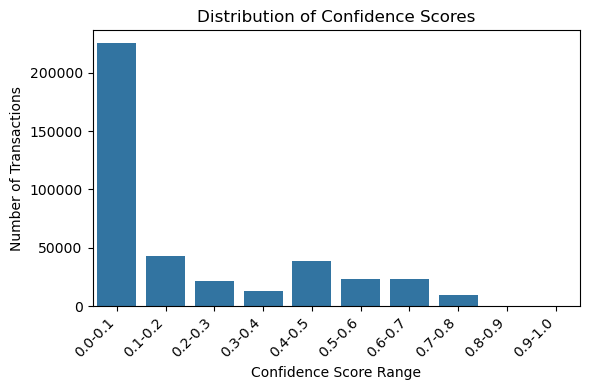

In [33]:
# confidence score graph plot
bins = [i/10 for i in range(11)] # binning edges: 0.0, 0.1, 0.2,..., 1.0
labels = [f'{bins[i]:.1f}-{bins[i+1]:.1f}' for i in range(len(bins)-1)]  # Labels: '0.0-0.1', '0.1-0.2', etc.
df['score_bin'] = pd.cut(df['confidence_score'], bins=bins, labels=labels, right=False, include_lowest=True)

plt.figure(figsize=(6, 4))
sns.countplot(x='score_bin', data=df, order=labels)
plt.title('Distribution of Confidence Scores')
plt.xlabel('Confidence Score Range')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [35]:
df['temp_fraud'] = (
    ((df['phone_number_diff'].abs() > 0) & (df['phone_number_diff'].abs() < 101)) |
    (df['unique_phone_numbers'] > 3) |
    (df['txn_count_per_customer_per_hour'] > 10) |
    (df['txn_count_per_customer_per_day'] > 20) |
    (df['amount_spike_flag'] == 1) |
    (df['unusual_txn_flag'] == 1) |
    (df['duplicate_txn_flag'] == 1) |
    (df['confidence_score'] >= 0.3)
).astype(int)

In [37]:
df.temp_fraud.value_counts()

temp_fraud
0    239895
1    156950
Name: count, dtype: int64

In [39]:
temp_fraud_df = df[df['temp_fraud']==1]

In [41]:
temp_fraud_df.is_fraud.value_counts()

is_fraud
1    101474
0     55476
Name: count, dtype: int64

In [43]:
temp_non_fraud_df = df[df['temp_fraud']==0]

In [45]:
temp_non_fraud_df.is_fraud.value_counts()

is_fraud
0    198047
1     41848
Name: count, dtype: int64

In [47]:
df.columns

Index(['customer_email', 'level_1', 'transaction_reference',
       'payment_reference', 'merchant', 'customer_name', 'cust_email',
       'customer_phone_number', 'merchant_bears_cost', 'tran_date',
       'payment_created_at', 'payment_updated_at', 'account_created_date',
       'account_risk_level', 'payment_status', 'payment_channel',
       'payment_reversals_type', 'mobile_number_for_mobile_money',
       'mobile_network_provider', 'processor_response',
       'kora_translated_processor_response', 'amount', 'amount_collected',
       'is_fraud', 'created_dow', 'created_hod', 'created_month',
       'completed_dow', 'completed_hod', 'completed_month',
       'payment_completion_time_secs', 'phone_number_diff',
       'unique_phone_numbers', 'diff_number_txns', 'total_transactions',
       'proportion_different_numbers', 'average_phone_number_difference',
       'shared_phone_number_flag', 'txn_count_per_customer',
       'txn_count_per_customer_per_hour', 'max_txns_in_an_hour_per_

In [49]:
# dropping columns
irrelevant_cols = ['customer_email', 'level_1', 'payment_reference', 'merchant', 'customer_name', 
                   'cust_email', 'customer_phone_number', 'tran_date', 'created_dow',
                   'payment_created_at', 'payment_updated_at', 'account_created_date',
                   'account_risk_level', 'payment_status', 'payment_channel',
                   'payment_reversals_type', 'mobile_number_for_mobile_money',
                   'mobile_network_provider', 'processor_response', 'created_month',
                   'kora_translated_processor_response', 'amount_collected', 
                   'created_dow','completed_dow', 'completed_hod', 'completed_month',
                   'payment_completion_time_secs', 'time_diff', 'score_bin']
df.drop(columns=irrelevant_cols, inplace=True)

In [51]:
df.to_csv('data/fe_data_with_compliance_thresholds.csv', index=False)